In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
!pip install pm4py
!apt install -y graphviz
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26094 sha256=27db8e6a023072dad3bd5b5516bea816d5347c887d72769f44339094b468842c
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16967 sha256=8094c1d3d7456cb74223ef876a4b56a87e9a0ceda3317d3a6c0da8cf21298f6b
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


Reading CSV file

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Process mining project/heart_log_val_0.csv')

NameError: ignored

In [ ]:
df.head()

,type,concept:name,value,time:timestamp,case:concept:name,case:gender,case:age,case:charlson,case:elixhauser,case:dob,case:dod,case:ethnicity,case:label,admission_id,PREDICT
0,lab,Sodium_mean_2,2.0,2166-07-23 17:03:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
1,lab,Sodium_std_0,0.0,2166-07-26 10:30:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
2,admission,unplanned,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
3,admission,Medicare,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
4,lab,Sodium_mean_2,2.0,2166-08-13 03:32:10+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN


In [ ]:
event_type = df['type'].unique()
print(event_type)

['lab' 'admission' 'artificial' 'elix_comorb']


In [ ]:
event = df['concept:name'].unique()

In [ ]:
for i in event:
    print(i)

Sodium_mean_2
Sodium_std_0
unplanned
Medicare
Urea Nitrogen_mean_2
Sodium_std_2
Urea Nitrogen_std_2
event_0
event_2
event_3
event_6
event_9
event_11
event_14
event_15
event_16
event_19
event_20
event_26
event_29
CHF
OND
COAG
FED
Urea Nitrogen_mean_1
Urea Nitrogen_std_1
Private
Sodium_mean_3
Urea Nitrogen_mean_3
CARIT
VALV
PARA
Urea Nitrogen_std_4
Medicaid
PCD
HYPUNC
CPD
HYPOTHY
Sodium_std_1
NTproBNP_mean_9
NTproBNP_std_1
Sodium_std_3
Urea Nitrogen_std_3
Sodium_mean_1
DIABUNC
LD
WLOSS
ALCOHOL
PVD
NTproBNP_std_0
HYPC
RF
DEPRE
planned
Creatinine, Serum_mean_0
Creatinine, Serum_std_0
DRUG
BLANE
SOLIDTUM
NTproBNP_std_6
OBES
DIABC
Urea Nitrogen_mean_0
PUD
METACANC
DANE
Sodium_mean_4
Sodium_std_4
LYMPH
Urea Nitrogen_mean_4
Urea Nitrogen_std_0
PSYCHO
RHEUMD


 Converting csv file to xes file

In [ ]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter

In [ ]:
xes_exporter.apply(df, '/content/drive/My Drive/Process mining project/test.xes')

exporting log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

Inductive miner

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

In [ ]:
import pm4py

In [ ]:
log = xes_importer.apply('/content/drive/My Drive/Process mining project/test.xes')
for thrd in ["0.9"]:
    ptree = inductive_miner.apply(log, parameters = {"NOISE_THRESHOLD": float(thrd)})
    net, initial_marking, final_marking = pm4py.convert_to_petri_net(ptree)
### Report Petri-net properties ###
print(float(thrd))
print("Process Tree: ",net)
print("PN Places:", len(net.places))
print("PN Transitions:", len(net.transitions))

parsing log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

0.9
Process Tree:  places: [ p_10, p_100, p_101, p_102, p_103, p_105, p_106, p_108, p_109, p_110, p_111, p_112, p_113, p_115, p_116, p_117, p_118, p_119, p_12, p_120, p_13, p_14, p_15, p_17, p_18, p_19, p_20, p_22, p_23, p_24, p_25, p_26, p_27, p_28, p_30, p_31, p_32, p_33, p_35, p_36, p_37, p_38, p_40, p_41, p_42, p_43, p_45, p_46, p_47, p_48, p_49, p_5, p_50, p_51, p_52, p_53, p_54, p_55, p_56, p_57, p_58, p_59, p_6, p_60, p_61, p_62, p_64, p_65, p_66, p_67, p_68, p_69, p_7, p_70, p_71, p_72, p_73, p_74, p_75, p_76, p_77, p_78, p_79, p_8, p_80, p_81, p_82, p_83, p_84, p_85, p_86, p_88, p_89, p_9, p_90, p_91, p_92, p_93, p_94, p_95, p_96, p_97, p_98, p_99, sink, source ]
transitions: [ (0006e68d-1a94-4ff4-a28d-301907af2f92, 'BLANE'), (00f57eb7-da41-4d08-a3b0-816215948f46, 'event_0'), (03229848-4419-453c-a058-51f7a1855586, 'planned'), (0b1b8e5d-e40b-48ad-926e-0a47bb5616aa, 'event_19'), (0c1da061-bb5a-4082-ba5e-93bf8abf9c80, 'Sodium_mean_2'), (0d130f70-59e3-4f94-86e1-ba5e6a3a203f, 'Urea

Exporting PNML

In [ ]:
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
pnml_exporter.apply(net, initial_marking, "/content/drive/My Drive/Process mining project/test.pnml", final_marking=final_marking)

In [ ]:
from pm4py.objects.petri_net.importer import importer as pnml_importer
net, im, fm = pnml_importer.apply("/content/drive/My Drive/Process mining project/test.pnml")

In [ ]:
print("PN Places:", len(net.places))
print("\nPN Places:", list(net.places))
print("\nPN Transitions:", len(net.transitions))
print("\nPN Transitions:", list(net.transitions))

PN Places: 106

PN Places: [p_117, p_89, p_45, p_68, p_82, p_17, p_33, p_8, p_109, p_48, p_69, p_28, p_38, p_53, p_42, p_74, p_93, p_27, p_81, p_101, p_75, p_103, p_78, p_96, p_59, p_10, p_12, p_115, p_90, p_119, p_36, p_18, source, p_76, p_73, p_83, p_9, p_84, p_31, p_106, p_120, p_100, p_43, p_97, p_61, p_19, p_116, p_88, p_113, p_40, p_111, p_92, p_37, p_7, p_26, p_14, p_79, p_56, p_108, p_65, p_23, p_52, p_67, p_85, p_24, p_118, p_105, p_95, p_15, p_6, p_110, p_102, p_112, p_64, p_54, p_58, p_91, p_71, p_77, p_99, p_22, p_55, sink, p_80, p_62, p_32, p_41, p_47, p_94, p_50, p_86, p_5, p_98, p_72, p_66, p_70, p_49, p_13, p_46, p_30, p_35, p_20, p_57, p_60, p_25, p_51]

PN Transitions: 164

PN Transitions: [(742818eb-d05d-4830-9e1f-3751607dd87e, 'Creatinine, Serum_mean_0'), (skip_78, None), (ec74dfe4-acdd-499e-a134-2993815895c4, 'SOLIDTUM'), (tauSplit_62, None), (skip_38, None), (tauJoin_13, None), (skip_86, None), (skip_105, None), (skip_69, None), (skip_79, None), (skip_19, None), (

Petri Net

In [ ]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import graphviz

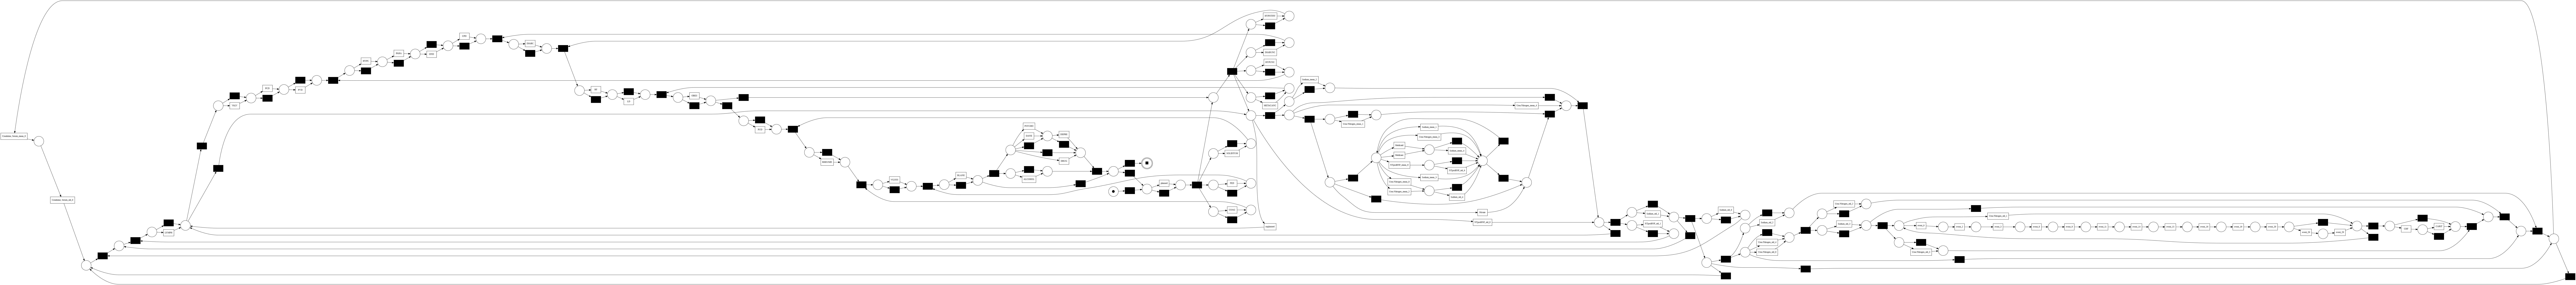

In [ ]:
#pm4py.view_petri_net(net,im,fm)
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)
#pn_visualizer.view(gviz)
#gviz.Source(gviz)

In [ ]:
#conformance checking

Conformance checking

Precision

In [ ]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant = precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

replaying log with TBR, completed variants ::   0%|          | 0/4545 [00:00<?, ?it/s]

In [ ]:
print(prec)

0.05858999540306742


Fitness

In [ ]:
# Token based
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness_token = replay_fitness_evaluator.apply(log, net, im, fm, variant = replay_fitness_evaluator.Variants.TOKEN_BASED)

# Alignment based
#fitness_alignment = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.ALIGNMENT_BASED)

replaying log with TBR, completed variants ::   0%|          | 0/78 [00:00<?, ?it/s]

In [ ]:
print(fitness_token)
#print(fitness_alignment)

{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.9766754245755334, 'log_fitness': 0.9767594953589542, 'percentage_of_fitting_traces': 0.0}
